In [4]:
import numpy as np
np.random.seed(42)

In [5]:
def generate_dataset():
    num_samples_class1 = 10
    num_samples_class2 = 6
    num_samples_class3 = 13
    cov = np.array([[1, 0], [0, 1]])
    data1 = np.random.multivariate_normal(mean=[0, 0], cov=cov, size=num_samples_class1)
    data2 = np.random.multivariate_normal(mean=[-10, 4], cov=cov, size=num_samples_class2)
    data3 = np.random.multivariate_normal(mean=[10, 10], cov=cov, size=num_samples_class3)
    
    data = np.concatenate((data1, data2, data3), axis=0)
    classes = np.array( [0 for i in range(num_samples_class1)] + [1 for i in range(num_samples_class2)] + [2 for i in range(num_samples_class3)] )
    return data, classes

In [9]:
x, y = generate_dataset()

In [10]:
print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

x shape: (29, 2)
y shape: (29,)


In [11]:
import matplotlib.pyplot as plt

def plot_data(x, y):
    plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='viridis')
    plt.show()

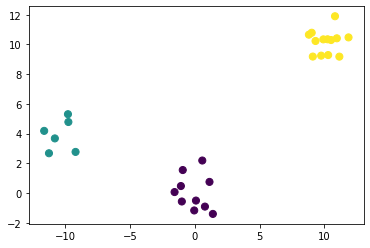

In [13]:
plot_data(x, y)

# KNN Implementation

In [22]:
class KNeighborClassifier:
    def __init__(self, n_neighbors: int = 5):
        self.n_neighbors = n_neighbors
        self.X: np.ndarray
        self.y: np.ndarray
        self.num_classes: int
    
    def _distance(self, p1: np.ndarray, p2: np.ndarray):
        return np.linalg.norm(p1 - p2)
    
    def kneighbors(self, X: np.ndarray):
        distances = np.array([[self._distance(sample, x_i) for x_i in self.X] for sample in X])
        sorted_distances_idx = np.argsort(distances[:])
        kneighbors_idxs = sorted_distances_idx[:, :self.n_neighbors]
        return kneighbors_idxs

    def fit(self, X: np.ndarray, y: np.ndarray):
        self.X = X
        self.y = y
        self.num_classes = len(np.unique(self.y))


    def _vote_class(self, kneighbors_idxs: np.ndarray):
        votes = np.zeros(shape=(self.num_classes))
        neighbors_classes = self.y[kneighbors_idxs]
        for neighbor_class in neighbors_classes:
            votes[neighbor_class] += 1
        voted_class = np.argmax(votes)
        return voted_class

    def predict(self, X: np.ndarray):
        kneighbors_idx = self.kneighbors(X)
        y_pred = np.array([self._vote_class(kneighbor_idxs) for kneighbor_idxs in kneighbors_idx])
        return y_pred

    def score(self, X: np.ndarray, y: np.ndarray):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy

In [49]:
x_test = np.array([
    [-6, 0.1],
    [10, 4.9],
    [-3, 8]
])
y_test = np.array([0, 1])

clf = KNeighborClassifier(n_neighbors=3)
clf.fit(x, y)

y_pred = clf.predict(x_test)

score = clf.score(x_test, y_test)

print(f"y_pred: {y_pred}")
print(f"score: {score}")

y_pred: [0 2 0]
score: 0.0


<ipython-input-22-d28feecce766>:38: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  accuracy = np.mean(y_pred == y)


In [50]:
def plot_knn_predicition(clf: KNeighborClassifier, X_samples: np.ndarray, X: np.ndarray, y: np.ndarray):
    colors = ['red', 'blue', 'green']
    for index, point in enumerate(X):
        plt.scatter(point[0], point[1], c=colors[y[index]])
    neighbors_idx = clf.kneighbors(X_samples)
    for index, point in enumerate(X_samples):
        neighbors_points = clf.X[neighbors_idx][index]
        neighbors_classes = clf.y[neighbors_idx][index]
        plt.scatter(point[0], point[1], c="black")
        for neighbor_point, neighbor_class in zip(neighbors_points, neighbors_classes):
            plt.plot([point[0], neighbor_point[0]], [point[1], neighbor_point[1]], '--', c=colors[neighbor_class])
    plt.show()

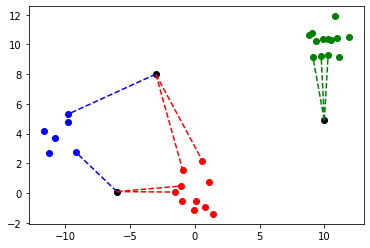

In [51]:
plot_knn_predicition(clf, x_test, x, y)